# # Logistic Regression Analysis


# Abstract:
Regression procedures are flexible in their application since they can quantify affiliations, anticipate results, and control for confounding variable effects. As one such procedure, logistic regression is a proficient and amazing method for breaking down the impact of a gathering of free factors on a binary outcome by measuring every autonomous variable's unique contribution.

Utilizing parts of linear regression reflected in the logit scale, logistic regression iteratively recognizes the strongest linear combination of factors with the best probability of distinguishing the noticed result. Significant contemplations when directing logistic regression incorporate choosing independent factors, guaranteeing that applicable assumptions are met, and picking a proper model-building methodology.


## Theory:

Logistic regression is a change of the linear regression model that permits us to probabilistically display binary variables. It is otherwise called a summed-up direct model that utilizes a logit interface. Logistic regression is a go-to demonstration for this utilization case. It displays the likelihood that perception takes on one of those two qualities. Instead of classing forecasts alone, as in SVMs. This allows us to measure the certainty of our model in its forecasts, and to play with class choice limits. Logistic regression is an ideal candidate model when we should have the option to clarify the effect of every predictor. A predictor's coefficients measure the effect of each feature on our model's forecasts through the proportion of the chances.


Logistic regression draws a smooth, linear choice limit between two classes. In this way assuming that our classes are directly detachable, logistic regression will perform well overall. We can likewise test for direct distinguishableness utilizing a linear support vector machine. In the event that we accept this is the situation, consider utilizing support vector machines with complex portions or tree-based techniques for characterization. Logistic regression is a somewhat basic model and will, by and large, fail to meet expectations against more intricate models. Assuming our objective is principally forecast precision instead of displaying interpretation, boosted trees or neural nets might be a superior decision.


We utilize logistic regression on the grounds that direct relapse isn't suitable for displaying twofold results. The following are two reasons why:

- A linear model makes persistent expectations that are unbounded. In binary characterization, we are keen on the likelihood of a result happening, so we need forecasts that are limited somewhere in the range of 0 and 1.



- Predicting double results with straight model abuses the presumption of ordinary residuals, misshaping inductions made on regression coefficients.


**Logit Function:**

Logistic regression, also called a logit model, it is a solution for classification is logistic regression.  Rather than fitting a straight line or hyperplane, the calculated relapse model uses the strategic capacity to press the result of a direct condition somewhere in the range of 0 and 1. The calculated capacity is characterized as:

Logit function(η)=1/1+e(−η)


**Assumptions of logistic regression:**

- The dependent variable is binary: If this isn't correct, then, at that point, logistic regression outputs don't apply.


- Linearity among logit and independent factors: Assuming this condition isn't met, logistic regression is invalid.


- No multicollinearity: Multicollinearity mutilates tests of factual importance on regression coefficients.


- Large sample size: This is to a greater degree a guideline.


**Advantages:**

- Logistic regression is simpler to carry out, decipher, and exceptionally effective to train.


- It makes no suppositions about conveyances of classes in feature space.


- It can undoubtedly reach out to numerous classes and a characteristic probabilistic perspective on class forecasts.


- It does not just give a proportion of how fitting predictors are, yet, in addition, its the direction of affiliation.


**Limitations:**

- In Linear Regression free and ward factors are connected straightly. Yet, Logistic Regression needs that autonomous factors are directly identified with the log chances (log(p/(1-p)).


- It is difficult to get intricate connections utilizing calculated relapse. All the more impressive and minimized calculations, for example, Neural Networks can without much of a stretch beat this algorithm.


- Logistic Regression requires normal or no multicollinearity between autonomous factors.


- Non-linear issues can't be tackled with logistic regression since it has a linear choice surface. Linearly separable data is seldom found in real-time situations.

# Analysis and Explanation:

**Importing Libraries:** 

In [82]:
import numpy as np
import matplotlib.pyplot as plt
import operator
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import pandas as pd

**Reading File from Local Disk:**

We will peruse the CSV record and take a gander at the first five rows of the data. Data set is scanned across all data points to filter out the null values in the data set, if it contains any.

In [84]:
df = pd.read_csv("C:\\Users\\Hello\\Downloads\\DSCI6002_prj2_data.csv")
df.head()


,spam,to_multiple,from,cc,sent_email,time,image,attach,dollar,winner,...,viagra,password,num_char,line_breaks,format,re_subj,exclaim_subj,urgent_subj,exclaim_mess,number
0,0,0,1,0,0,2011-12-31 22:16:41,0,0,0,no,...,0,0,11.370,202,1,0,0,0,0,big
1,0,0,1,0,0,2011-12-31 23:03:59,0,0,0,no,...,0,0,10.504,202,1,0,0,0,1,small
2,0,0,1,0,0,2012-01-01 08:00:32,0,0,4,no,...,0,0,7.773,192,1,0,0,0,6,small
3,0,0,1,0,0,2012-01-01 01:09:49,0,0,0,no,...,0,0,13.256,255,1,0,0,0,48,small
4,0,0,1,0,0,2012-01-01 02:00:01,0,0,0,no,...,0,2,1.231,29,0,0,0,0,1,none


The head() method in the pandas series is used to retrieve the topmost rows from a series object. By default, it will display 5 rows of series data, and we can customize the number of rows other than 5 rows. This method takes an integer value as a parameter to return a series with particular rows, suppose if you give integer c as a parameter to the head method like head(c) then it will return a pandas series with c number of elements. And those elements are the first c number of elements of our pandas series object.

# Data Preparation: Creating dummy columns to replace string values

In [102]:
from patsy import dmatrices
temp,X = dmatrices('winner~spam',df,return_type='dataframe')
temp['winner[yes]']
df['winner(yes)'] = temp['winner[yes]']
df['winner(no)'] = temp['winner[no]']
#creating dummy columns to replace string columns
temp1,X1 = dmatrices('number~spam',df,return_type='dataframe')
temp1['number[small]']
df['number(small)'] = temp1['number[small]']
df['number(big)'] = temp1['number[big]']
df['number(none)'] = temp1['number[none]']
df

,spam,to_multiple,from,cc,sent_email,time,image,attach,dollar,winner,...,re_subj,exclaim_subj,urgent_subj,exclaim_mess,number,winner(yes),winner(no),number(small),number(big),number(none)
0,0,0,1,0,0,2011-12-31 22:16:41,0,0,0,no,...,0,0,0,0,big,0.0,1.0,0.0,1.0,0.0
1,0,0,1,0,0,2011-12-31 23:03:59,0,0,0,no,...,0,0,0,1,small,0.0,1.0,1.0,0.0,0.0
2,0,0,1,0,0,2012-01-01 08:00:32,0,0,4,no,...,0,0,0,6,small,0.0,1.0,1.0,0.0,0.0
3,0,0,1,0,0,2012-01-01 01:09:49,0,0,0,no,...,0,0,0,48,small,0.0,1.0,1.0,0.0,0.0
4,0,0,1,0,0,2012-01-01 02:00:01,0,0,0,no,...,0,0,0,1,none,0.0,1.0,0.0,0.0,1.0
5,0,0,1,0,0,2012-01-01 02:04:46,0,0,0,no,...,0,0,0,1,none,0.0,1.0,0.0,0.0,1.0
6,0,1,1,0,1,2012-01-01 09:55:06,0,0,0,no,...,0,0,0,1,big,0.0,1.0,0.0,1.0,0.0
7,0,1,1,1,1,2012-01-01 10:45:21,1,1,0,no,...,0,0,0,18,small,0.0,1.0,1.0,0.0,0.0
8,0,0,1,0,0,2012-01-01 13:08:59,0,0,0,no,...,0,0,0,1,small,0.0,1.0,1.0,0.0,0.0
9,0,0,1,0,0,2012-01-01 10:12:00,0,0,0,no,...,0,0,0,0,small,0.0,1.0,1.0,0.0,0.0


Benefits data preparation 

Faster data transformation : Use machine learning recommendations to format, join, tag and cleanse data. No coding required.

Self-service collaboration : Share transformed data sets throughout the enterprise and with BI and analytics tools.

Use trusted data : Connect to data governance, lineage and privacy tools to drive compliance and value.



# Data preparation: Splitting data into Training and Test data

In [453]:
#splitting data into test and training data
train_data=df.sample(frac=0.8,random_state=200) 
test_data=df.drop(train_data.index)

y_train = train_data[['spam']].copy()
y_test = test_data[['spam']].copy()
del_col = ['spam','time','winner','number']
for i in del_col:#popping out string columns
    train_data.pop(i)
    test_data.pop(i)
#train_data
X_train= train_data#converting X_train into np.array()
X_test = test_data#converting X_test into np.array()

y_train = y_train.values
y_test = y_test.values

# List of features post data preparation step

In [340]:
df.columns

Index(['spam', 'to_multiple', 'from', 'cc', 'sent_email', 'time', 'image',
       'attach', 'dollar', 'winner', 'inherit', 'viagra', 'password',
       'num_char', 'line_breaks', 'format', 're_subj', 'exclaim_subj',
       'urgent_subj', 'exclaim_mess', 'number', 'winner(yes)', 'winner(no)',
       'number(small)', 'number(big)', 'number(none)'],
      dtype='object')

In [455]:
def append_column_one(data):    
    append_ones = np.ones((data.shape[0],1))
    data = np.hstack((append_ones, data))
    return data


In [456]:
X_train = append_column_one(X_train)
X_test = append_column_one(X_test)
 
np.place(y_train, y_train == 0, -1)
np.place(y_test, y_test == 0, -1)

# Training data shape

In [485]:
X_train.shape

(3137, 23)

# Activation function: Sigmoid function

In [458]:
def calculate_sigmoid(x):
    return 1/(1 + np.exp(-x))


A Sigmoid function is a mathematical function which has a characteristic S-shaped curve. There are a number of common sigmoid functions, such as the logistic function, the hyperbolic tangent, and the arctangent

# Model building

In [459]:
def calculate_update(X_train, y_train, weights, sigmoid_iter):
    update = np.zeros(len(weights))
    for i in range(0, X_train.shape[0]):
        update += y_train[i] * (1 - sigmoid_iter[i]) * X_train[i]
    return update

In [460]:
def calculate_objectiveFunc(X_train, y_train, weights):
    output = 0
    sigmoid_iter = []
    for i in range(0, X_train.shape[0]):
        sigmoid_value = calculate_sigmoid(y_train[i] * np.dot(X_train[i], weights))
        sigmoid_iter.append(sigmoid_value)
        output += np.log(sigmoid_value)
    return output, sigmoid_iter

# Declaring weights and iterations for the model training

In [461]:
objective_value = []
w = np.zeros(X_train.shape[1])
for t in range(1, 5000):
    #print "Iteration ", t
    learning_rate = 1.0 / (np.power(10, 5)*np.sqrt(t + 1))
    iter_objectiveVal, sigmoid_iter = calculate_objectiveFunc(X_train, y_train, w)
    objective_value.append(iter_objectiveVal)
    #print iter_objectiveVal
    w = w + (learning_rate * calculate_update(X_train, y_train, w, sigmoid_iter))


# Visualising model training Vs number of iterations
- After 1000 iterations, cost is maintained constantly at 1000

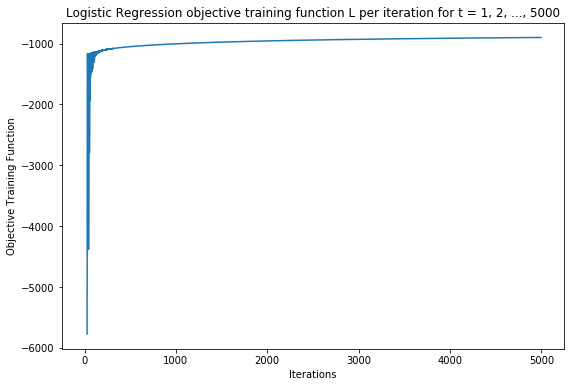

In [462]:
plt.figure(figsize=(9, 6))
plt.plot(objective_value)
plt.xlabel("Iterations")

plt.ylabel("Objective Training Function")
plt.title("Logistic Regression objective training function L per iteration for t = 1, 2, ..., 5000")
plt.show()

As the number of iterations increases model accuracy (output) increases. 

# Predicting the test values

In [463]:
def predict_test_data(X_test, weights,threshold):
    predicted_test = []
    for i in range(0, len(X_test)):
        output = calculate_sigmoid(np.dot(X_test[i], weights))
        if output > threshold:
            predicted_test.append(1)
        else:
            predicted_test.append(-1)
    return predicted_test

to determine number of  test values can be performed

In [478]:
predictions = predict_test_data(X_test, w,0.25)
len(predictions)

784

# Showing the prediction accuracy of the model

In [479]:
def prediction_accuracy(predicted_labels, original_labels):
    count = 0
    for i in range(len(predicted_labels)):
        if predicted_labels[i] == original_labels[i]:
            count += 1
    print (count)
    return float(count)/len(predicted_labels)

In [476]:
print("Prediction accuracy is {}%".format(prediction_accuracy(y_test, predictions)*100))

715
Prediction accuracy is 91.19897959183673%


# Calculating True postivie, True Negative, False positive and False negative

In [480]:
tp=fp=tn=fn=0
for i in range(len(predictions)):
    if y_test[i]==-1:
        if y_test[i]==predictions[i]: tp=tp+1
        else: fn=fn+1
    if y_test[i]==1:
        if y_test[i]==predictions[i]:tn = tn+1
        else: fp = fp+1
print("tp={},fp={},tn={},fn={}".format(tp,fp,tn,fn))
    
        

tp=632,fp=39,tn=30,fn=83


# Finding the sensitivity and specificity for the given data

In [481]:
sensitivity= tp/(tp+fn)
specificity = tn/(fp+tn)


print("sensistivity={} and specificity={}".format(sensitivity,specificity))

sensistivity=0.8839160839160839 and specificity=0.43478260869565216


Sensitivity & Specificity is the metric that evaluates a model's ability to predict true positives of each available category. 


# Building the ROC curve


In [482]:
thresholds=[0.1,0.2,0.3,0.4,0.5]
tp=tn=fp=fn=0
tpr=[]
fpr=[]
sensitivity=[]
predicted_test=[]
specificity=[]

for threshold in thresholds:
    predicted_test=predict_test_data(X_test, w,threshold)
    for i in range(len(predicted_test)):
        if y_test[i]==-1:
            if y_test[i]==predicted_test[i]: tp=tp+1
            else: fn=fn+1
        if y_test[i]==1:
            if y_test[i]==predicted_test[i]:tn = tn+1
            else: fp = fp+1
        try:       
            tpr_1 = tp/(tp+fn)
            fpr_1 = fp/(fp+tn)
            sen= tp/(tp+fn)
            spe = tn/(fp+tn)
        except ZeroDivisionError: 
            fpr_1=0
            spe=0
        
    tpr.append(tpr_1)
    fpr.append(fpr_1)
    sensitivity.append(sen)
    specificity.append(spe)

print('The True Positive Rate for Given Threshold are:',tpr)
print('\nThe False Positive Rate  Given Threshold are:',fpr)

print('The Sensitivity for Given Threshold are:',sen)
print('\nThe Specificity for  Given Threshold are:',spe)


The True Positive Rate for Given Threshold are: [0.45874125874125876, 0.6055944055944056, 0.7291375291375292, 0.7968531468531469, 0.8374825174825175]

The False Positive Rate  Given Threshold are: [0.15942028985507245, 0.2318840579710145, 0.4396135265700483, 0.5797101449275363, 0.663768115942029]
The Sensitivity for Given Threshold are: 0.8374825174825175

The Specificity for  Given Threshold are: 0.336231884057971


# Plotting the sensitivity and specificity for different threshold values

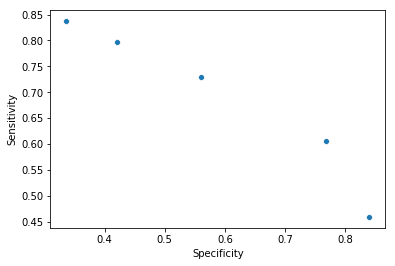

In [483]:
import seaborn as sns
sns.scatterplot(x=specificity,y=sensitivity)
plt.xlabel('Specificity')
plt.ylabel('Sensitivity')
plt.show()

# AUC curve

AUC: 0.3527770007770008


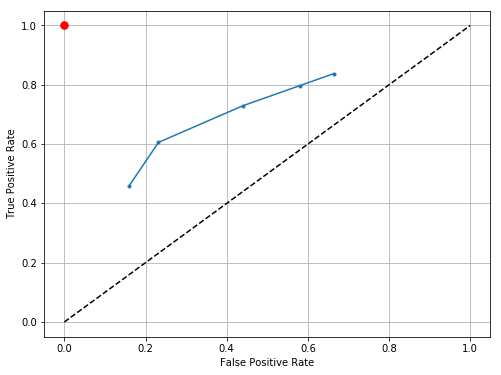

In [484]:
auc=np.trapz(tpr,fpr)
print("AUC: {}".format(auc))

plt.figure(figsize=(8,6))
plt.plot(fpr,tpr,'.-');
plt.plot([0,1],[0,1],'k--')
plt.plot([0],[1],'r.',markersize=15)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid()

Area Under the Curve (AUC) is a mathematical method of measuring the variation of data. Area Under the Curve The "curve" referred to in AUC is the curve on a (data vs time) graph. AUC relates the hit rate to the false alarm rate has become a standard measure in tests of predictive modeling accuracy. The AUC is an estimate of the probability that a classifier will rank a randomly chosen positive instance higher than a randomly chosen negative instance

# conclusion


This project aimed to explain the basic principles offer a comprehensive description or mathematical derivation of the techniques for analysis of binary dependent variables. Main idea is to estimate the spam mails based on given input data, to determine this situation we created a model which has Prediction accuracy of 91.2 %.
where as sensitivity=0.8839160839160839, specificity=0.43478260869565216 and auc is 0.35.




# Logistic Regression using sklearn

In [15]:
import pandas as pd
import numpy as np
df_sk = pd.read_csv("C:\\Users\\Hello\\Downloads\\DSCI6002_prj2_data.csv")

In [16]:
df_sk.drop('time',1,inplace=True)

In [17]:
from patsy import dmatrices
temp,X = dmatrices('winner~spam',df_sk,return_type='dataframe')
temp['winner[yes]']
df_sk['winner(yes)'] = temp['winner[yes]']
df_sk['winner(no)'] = temp['winner[no]']
#creating dummy columns to replace string columns
temp1,X1 = dmatrices('number~spam',df_sk,return_type='dataframe')
temp1['number[small]']
df_sk['number(small)'] = temp1['number[small]']
df_sk['number(big)'] = temp1['number[big]']
df_sk['number(none)'] = temp1['number[none]']
df_sk.drop('winner',1,inplace=True)
df_sk.drop('number',1,inplace=True)

In [8]:
spam=df_sk.spam
df_sk.drop('spam',1,inplace=True)

# Splitting the data into training and test sets

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_sk, spam, test_size=0.25, random_state=0)

# Importing the model to be used

In [14]:
from sklearn.linear_model import LogisticRegression

# Making instance of the imported model

In [18]:
logisticRegr = LogisticRegression()

# Training the model with the data

In [19]:
logisticRegr.fit(x_train, y_train)

C:\Users\Hello\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [21]:
predictions = logisticRegr.predict(x_test)


In [22]:
score = logisticRegr.score(x_test, y_test)
print(score)

0.9021406727828746


# Conclusion
- When compared, the model developed using basic NumPy library and the model developed using sklearn have shown similar accuracies.